# StreetEasy Multiple Linear Regression Project

StreetEasy is a tool in New York City to find real estate. I got the dataset off a repository on GitHub. The data sets contain 3,500+ data entries regarding various homes in different areas around Manhattan.

In our dataset there is the following information:
- rental_id : rental ID
- building_id: building ID
- rent: price of rent in dollars
- bedrooms: number of bedrooms
- bathrooms: number of bathrooms
- size_sqft: size in square feet
- min_to_subway: distance form subway station in minutes
- floor: floor number
- building_age_yrs: building's age in years
- no_fee: does it have a broker fee? (0 for fee, 1 for no fee)
- has_roofdeck: does it have a roof deck? (o for no, 1 for yes)
- has_washer_dryer: does it have washer/dryer in unit (0/1
- has_doorman: does it have a doorman? (0/1)
- has_elevator: does it have an elevator? (0/1)
- has_dishwasher: does it have a dishwasher? (0/1)
- has_patio: does it have a patio? (0/1)
- has_gym: does the building have a gym? (0/1)
- neighborhood:	neighborhood (ex: Greenpoint)
- submarket: submarket (ex: North Brooklyn)
- borough: borough (ex: Brooklyn)

### Goal

Our goal is to make a linear regression model that takes multiple different facts in to consideration and is able to predict somewhat accurately how much that piece of real estate will cost to rent.

### Table of Contents

- Preparing the Data
- Training
- Testing and Multiple Linear Regression
- Conclusion

## Preparing the Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
manhattan = pd.read_csv('manhattan.csv')

Let's take a look at our data.

In [6]:
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [47]:
manhattan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


Let's organize our data into something we can use to train our Linear Regression models. We will start by training it with the data from Manhattan.

We will pick out the different factors that we think will influence the price of rent. Here we have selected 14 of our variables for the model to consider.

In [33]:
x = manhattan[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = manhattan[['rent']]

Let's check that they look how we expect.

In [34]:
x.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


In [48]:
y.head()

,rent
0,2550
1,11500
2,4500
3,4795
4,17500


They do look how we expect! Now we will make and train our model.

## Training

Now we will train our model.

We need to split up our data so we have a portion of it we can use to train our model and then a portion that we can use to test the training.  We will use 80% to train and set aside 20% to test.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)

Let's check that they are the right shape. We have specified 14 different features that we are looking for in our x values, and 1 in our y values.

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


Then we will make our linear regression model.

In [38]:
mlr = LinearRegression()

Now we will train it using our x_train and y_train.

In [39]:
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

And then we will have it make some predictions.

In [40]:
y_predict = mlr.predict(x_test)

Now we are all set to test these predictions and see how it compares to the actual data.

## Testing and Mulitple Linear Regression

Now we want to test the data that it predicted (our y_predict variable) compared to the actual cost of rent.  We will use our test portions of the data to do this.

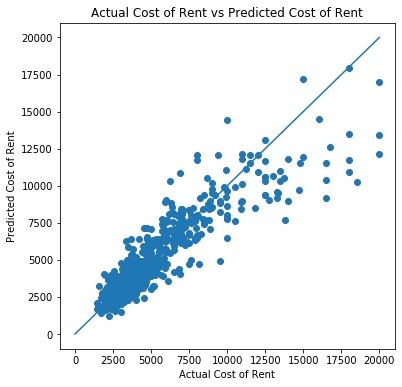

In [45]:
plt.figure(figsize = (6, 6))
plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))
plt.xlabel('Actual Cost of Rent')
plt.ylabel('Predicted Cost of Rent')
plt.title('Actual Cost of Rent vs Predicted Cost of Rent')
plt.show()

For comparison, I have graphed a straight line in our data to show what a perfect fit would be. 

We can tell already that our model doesn't have complete accuracy.  If it were completely accurate, it would have a slope of one, meaning that the predicted cost of rent is the same as the actual cost, and it would fit the line drawn over the graph. From looking at the scaling of our x and y axes, we can already tell that it doesn't look like a 1:1 ratio.  But let's look more into it and see how close it was.

In [43]:
print(mlr.coef_)
print(mlr.intercept_)
coef = mlr.coef_.reshape(-1, 1)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]
[-344.68587986]


So here we can see that we have 14 coefficents, corresponding to our 14 different variables.

We will explore the accuracy using residual analysis. We will find the difference between the predicted y and the actual y, called the residual e and the $R^2$ value. The $R^2$ value is the percentage variation in y explained by all the x variables together. We will go with the convention that $R^2$ of 0.7 is good. The equation for the $R^2$ value is as follows:

$R^2 = 1 - u/v$

Residual sum of squares, $u = \Sigma((y - y_{predict})^2)$

Total sum of squares, $v = \Sigma((y - y_{mean})^2).sum()$

Residual $e, e = (y - y_{predict})$

In [44]:
train_score = mlr.score(x_train, y_train)
print('Train score:', train_score)

test_score = mlr.score(x_test, y_test)
print('Test score:', test_score)

Train score: 0.7725460559817883
Test score: 0.805037197535764


So we can see that they aren't bad based on our convention of $R^2$ being above 0.7.

## Conclusion

In this notebook we were able to successfully build a linear regression model that took multiple inputs in to consider rent prices in Manhattan.  We were able to get a test score of $R^2 = 0.81$ after training our model on 80% of our data and using 20% to test.